# Klasifikasi Menggunakan SVM

### Langkah Pertama: Menghubungkan Google Drive dengan Colab



In [1]:
from google.colab import drive
# Menyambungkan Google Drive untuk akses file
drive.mount('/content/drive')
# Pastikan Anda memiliki izin akses ke folder terkait di Google Drive.

Mounted at /content/drive


### Tahapan 2: Membaca file CSV dari Google Drive ke dalam DataFrame

In [2]:
import pandas as pd

# Path ke file CSV di Google Drive
file_path = '/content/drive/MyDrive/week 9/CreditDataset.csv'

# Membaca file CSV ke dalam DataFrame
data = pd.read_csv(file_path)

# Menampilkan 5 baris pertama untuk memverifikasi data
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x12,x13,x14,x15,x16,x17,x18,x19,x20,Class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


### Tahapan 3: Menyiapkan data dan memilih subset prediktor serta menetapkan variabel target dari DataFrame


In [3]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Identifikasi prediktor dan target setelah analisis dataset
categorical_features = ['x1', 'x3', 'x4', 'x6', 'x7', 'x9', 'x10', 'x12', 'x14', 'x15', 'x17', 'x19', 'x20']
numerical_features = ['x2', 'x5', 'x8', 'x11', 'x13', 'x16', 'x18']

# Encode kolom kategorikal
encoder = LabelEncoder()
for col in categorical_features:
    data[col] = encoder.fit_transform(data[col])

# Gabungkan fitur kategorikal dan numerik
predictors = categorical_features + numerical_features
X = data[predictors]

# Tetapkan kolom target sebagai variabel target
target = 'Class'
y = data[target]

# Standarisasi data numerik
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

<ipython-input-3-cf39eda91224>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_features] = scaler.fit_transform(X[numerical_features])


### Tahapan 4: Membagi data menjadi pelatihan dan pengujian



In [6]:
train_data, test_data, train_target, test_target = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


### Tahapan 5: Melatih model menggunakan SVM Classification dan mengevaluasi hasilnya


              precision    recall  f1-score   support

           1       0.81      0.89      0.84       140
           2       0.65      0.50      0.57        60

    accuracy                           0.77       200
   macro avg       0.73      0.69      0.70       200
weighted avg       0.76      0.77      0.76       200

AUC Score: 0.7927380952380954


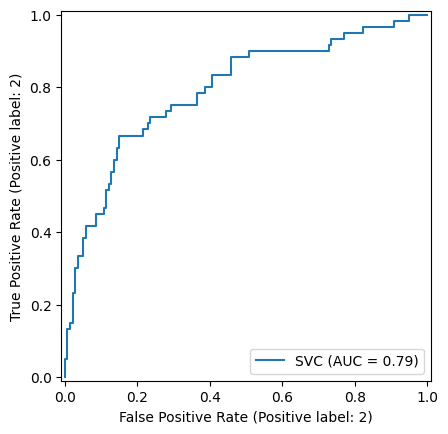

In [5]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, RocCurveDisplay

# Membuat model SVM
svm_model = SVC(probability=True, random_state=42)

# Melatih model
svm_model.fit(train_data, train_target)

# Melakukan prediksi
y_pred = svm_model.predict(test_data)
y_prob = svm_model.predict_proba(test_data)[:, 1]

# Evaluasi hasil
print(classification_report(test_target, y_pred))
auc_score = roc_auc_score(test_target, y_prob)
print("AUC Score:", auc_score)

# Visualisasi ROC Curve
RocCurveDisplay.from_estimator(svm_model, test_data, test_target)


### **Kesimpulan**
-Model SVM menunjukkan kinerja yang baik untuk Class 1 (kelas mayoritas) dengan nilai precision, recall, dan F1 yang tinggi.

-Untuk Class 2 (kelas minoritas), performanya lebih rendah, terutama pada recall yang hanya mencapai 0,50, menunjukkan bahwa model kurang efektif dalam mendeteksi sampel dari Class 2.

-Accuracy dan AUC Score mencerminkan performa keseluruhan yang cukup memadai, namun ketidakseimbangan kelas memengaruhi hasil prediksi untuk Class 2.

-Upaya peningkatan performa pada Class 2 dapat dilakukan dengan:

    -Menggunakan metode penyeimbangan data seperti oversampling atau undersampling.

    -Melakukan optimasi parameter model.
    -Mencoba model lain yang lebih cocok untuk menangani data dengan distribusi kelas yang tidak seimbang.

### Tahapan 6: Membuat gridsearch parameter untuk menemukan parameter terbaik untuk SVM Classification


In [7]:
from sklearn.model_selection import GridSearchCV

# Menentukan parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# GridSearchCV untuk optimasi
svm_grid_search = GridSearchCV(SVC(probability=True, random_state=42), param_grid, cv=5, scoring='roc_auc', verbose=3)

# Melatih grid search
svm_grid_search.fit(train_data, train_target)

# Menampilkan parameter terbaik
print("Best Parameters:", svm_grid_search.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.743 total time=   0.1s
[CV 2/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.772 total time=   0.1s
[CV 3/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.795 total time=   0.1s
[CV 4/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.807 total time=   0.1s
[CV 5/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.799 total time=   0.1s
[CV 1/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.758 total time=   0.1s
[CV 2/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.808 total time=   0.2s
[CV 3/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.779 total time=   0.2s
[CV 4/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.805 total time=   0.2s
[CV 5/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.773 total time=   0.3s
[CV 1/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.756 total time=   0.1s
[CV 2/5] END ...C=0.1, gamma=scale, kernel=poly

### **Kesimpulan**
Kombinasi parameter terbaik yang digunakan adalah C=1, gamma='scale', dan kernel='rbf'. Pengaturan C=1 memastikan keseimbangan yang baik antara akurasi pelatihan dan kemampuan generalisasi model. Parameter gamma='scale' menjaga stabilitas model dengan menghitung skala secara otomatis berdasarkan data yang diberikan. Sementara itu, penggunaan kernel='rbf' memungkinkan model menangani pola data yang tidak linier dengan lebih baik. Kombinasi ini membuktikan bahwa model SVM dengan kernel RBF dan pengaturan parameter ini sangat cocok untuk dataset Anda, menghasilkan performa optimal seperti yang ditunjukkan oleh evaluasi sebelumnya.

### evaluasi hasil menggunakan parameter terbaik dan visualisasinya


Accuracy: 0.77
Precision: 0.8051948051948052
Recall: 0.8857142857142857
F1 Score: 0.8435374149659864
AUC Score: 0.7927380952380954


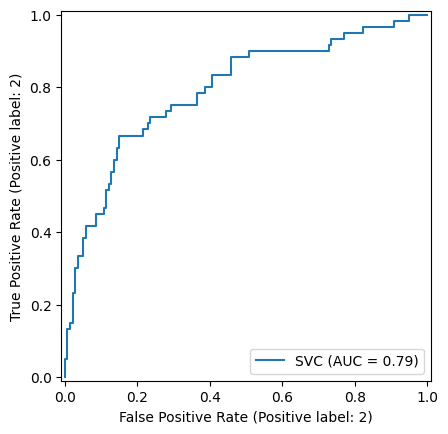

In [10]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import matplotlib.pyplot as plt

# Melakukan prediksi dengan model terbaik
optimal_model = svm_grid_search.best_estimator_
y_best_pred = optimal_model.predict(test_data)
y_best_prob = optimal_model.predict_proba(test_data)[:, 1]

# Evaluasi model
precision, recall, f1, _ = precision_recall_fscore_support(test_target, y_best_pred, average='binary')
accuracy = accuracy_score(test_target, y_best_pred)
auc_best_score = roc_auc_score(test_target, y_best_prob)

# Menampilkan metrik evaluasi
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc_best_score)

# Visualisasi ROC Curve
RocCurveDisplay.from_estimator(optimal_model, test_data, test_target)
plt.show()


### **Kesimpulan**
Dengan parameter terbaik ini:
1. **Akurasi tinggi (77%)** menunjukkan performa model yang solid secara keseluruhan.
2. **Precision (80.5%)** dan **Recall (88.6%)** yang tinggi menunjukkan bahwa model dapat memprediksi Class 2 (positif) dengan baik.
3. **F1-Score (84.4%)** menegaskan keseimbangan antara precision dan recall.
4. **AUC Score (0.79)** menunjukkan kemampuan pemisahan kelas yang baik.

Performa ini membuktikan bahwa parameter **C=1**, **gamma='scale'**, dan **kernel='rbf'** cocok untuk dataset ini dan membantu model SVM mencapai kinerja optimal.